https://www.youtube.com/watch?v=DfNo32nL_fo

https://towardsdatascience.com/inter-rater-agreement-kappas-69cd8b91ff75

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
import pandas as pd
str_file_name = "100_Tweets_KAPPA.csv"
df = pd.read_csv(str_file_name , engine='python')
df.head(2)

Wall time: 429 ms


,@RailMinIndia Loss Rupees 2500 on Monday due to 2.5 hrs latency in Jbp-Ind express. Very bad. Late without any reason. Got late in ofc
0,@RailMinIndia below stated train waste almost ...
1,@RailMinIndia having very bad experience by ra...


Create Confusion Metrics for TAGGER 1 & TAGGER 2

In [4]:
T1 = df['TAGGER_1']
T2 = df['TAGGER_2']

KeyError: 'TAGGER_1'

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as plt

labels = ['YES', 'NO']
cm = confusion_matrix(T1, T2, labels)
print(cm)


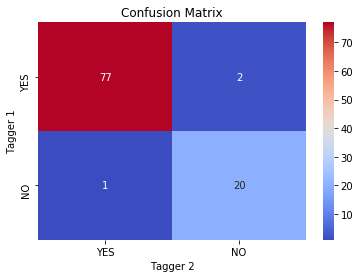

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="coolwarm");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Tagger 2');ax.set_ylabel('Tagger 1'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['YES', 'NO']); ax.yaxis.set_ticklabels(['YES', 'NO']);

KAPPA CALCULATION

In [6]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(T1, T2)

0.9111374407582938

# TAGGER AGREEMENT DONE WITH KAPPA METRICS

Gwet's AC1
AC1 was originally introduced by Gwet in 2001 (Gwet, 2001). The interpretation of AC1 is similar to generalized kappa (Fleiss, 1971), which is used to assess inter-rater reliability when there are multiple raters. Gwet (2002) demonstrated that AC1 can overcome the limitations that kappa is sensitive to trait prevalence and rater's classification probabilities (i.e., marginal probabilities), whereas AC1 provides more robust measure of inter-rater reliability [6].

In [9]:
from pycm import *

In [17]:
TT1 = T1.to_numpy()
TT2 = T2.to_numpy()

In [20]:
cm1 = ConfusionMatrix(TT1, TT2,digit=5)
cm1.AC1 

0.9547135632877952

Scott's Pi
Scott's pi (named after William A. Scott) is a statistic for measuring inter-rater reliability for nominal data in communication studies. Textual entities are annotated with categories by different annotators, and various measures are used to assess the extent of agreement between the annotators, one of which is Scott's pi. Since automatically annotating text is a popular problem in natural language processing, and the goal is to get the computer program that is being developed to agree with the humans in the annotations it creates, assessing the extent to which humans agree with each other is important for establishing a reasonable upper limit on computer performance

In [22]:
cm1.PI

0.9111242778847577

Bennett's S
Bennett, Alpert & Goldstein’s S is a statistical measure of inter-rater agreement. It was created by Bennett et al. in 1954. Bennett et al. suggested adjusting inter-rater reliability to accommodate the percentage of rater agreement that might be expected by chance was a better measure than a simple agreement between raters

In [23]:
cm1.S

0.94

In [30]:
print(" Cohen's Kappa : " , round(cm1.Kappa,2))
print(" Gwet's AC1 : " , round(cm1.AC1,2))
print(" Scott's Pi : " , round(cm1.PI,2))
print(" Bennett's S : " , round(cm1.S,2))

 Cohen's Kappa :  0.91
 Gwet's AC1 :  0.95
 Scott's Pi :  0.91
 Bennett's S :  0.94
